# Analysis of the DLR Knowledge Exchange Workshop Series on Software Engineering
The following Jupyter notebook gives an overview about the five different workshops and participants since 2014. First, we show a basic overview about the workshop and the participant data. Then, we identify the two main groups and check their attendance behavior for every workshop. Finally, we consider how many participants attended the next workshop.

## Basic overview
### Workshop data
The following data set contains the basic information about every workshop including its main topic, number of participants, date, location, and the number of employees currently working at the workshop location. In addition, we calculate the total number of workshop series participants and the average number of participants.

In [1]:
import pandas as pd

workshops = pd.read_csv("data/workshops.csv", index_col="id")
total_num_participants = workshops.num_participants.sum()
average_num_participants = total_num_participants / len(workshops)

print("Total number of participants:", total_num_participants)
print("Average number of participants:", average_num_participants)
workshops.head(6)

Total number of participants: 320
Average number of participants: 53.333333333333336


,topic,num_participants,date,location,num_employees_at_workshop_location
id,,,,,
0,kick-off,57,November 2014,Braunschweig,1140
1,tools and processes,56,April 2015,Cologne,1581
2,open and inner Source,53,April 2016,Oberpfaffenhofen,1692
3,software architecture,52,April 2017,Berlin,649
4,embedded systems,47,May 2018,Bremen,183
5,software engineering for data science,55,May 2019,Jena,50


### Participant data
The participant data has been pre-processed as follows:
- The basis formed the registration lists which have been further cleaned up by removing duplicates and double-checking them with the available attendance lists.
- The data has been anonymized by removing the participants names.
- Specific helper fields have been calculated to support the later analysis.

The resulting data set only contains the unique participants of the workshop series. I.e., every entry represents an unique particpant and indicates the total number of workshops visited, the specific workshops visisted, if the participant still works for the DLR and whether we consider the particpant a non-regular visitor. The last field (non-regular) indicates whether the participant visited more than one workshop but skipped more than one workshop in a row while still working at DLR. The field is later used to differentiate the core participant group.

In [2]:
participants = pd.read_csv("data/participants.csv", index_col="id")
total_unique_participants = len(participants)

print("Total number of unique participants:", total_unique_participants)
participants.head(10)

Total number of unique participants: 223


,num_workshops_visited,1,2,3,4,5,6,currently_works_for_DLR,non_regular
id,,,,,,,,,
0,6,True,True,True,True,True,True,True,False
1,6,True,True,True,True,True,True,True,False
2,6,True,True,True,True,True,True,True,False
3,6,True,True,True,True,True,True,True,False
4,6,True,True,True,True,True,True,True,False
5,5,True,True,False,True,True,True,True,False
6,5,True,True,True,True,True,False,True,False
7,5,False,True,True,True,True,True,True,False
8,4,True,True,True,False,True,False,True,False


### Location Data
The location data for each workshop lists for each particpant it's location of origin as well as if this was the only workshop he or she attended. The data has been anonymized by removing the participants names. The IDs used are not related to each other or the IDs of the participant data set.

In [3]:
locations_ws1 = pd.read_csv("data/ws1_location.csv", index_col="id")
locations_ws2 = pd.read_csv("data/ws2_location.csv", index_col="id")
locations_ws3 = pd.read_csv("data/ws3_location.csv", index_col="id")
locations_ws4 = pd.read_csv("data/ws4_location.csv", index_col="id")
locations_ws5 = pd.read_csv("data/ws5_location.csv", index_col="id")
locations_ws6 = pd.read_csv("data/ws6_location.csv", index_col="id")

locations = pd.concat([locations_ws1, locations_ws2, locations_ws3, locations_ws4, locations_ws5, locations_ws6], keys=['BS', 'KP', 'OP', 'BA', 'HB', 'JE'])

# Amount of unique locations from which people attended
unique_locations = locations["location"].drop_duplicates().count()
print ("Unique locations from which people attended the workshop series:", unique_locations)
locations.head(10)

Unique locations from which people attended the workshop series: 16


location  one_time_participant
   id                               
BS 0        GO                 False
   1        OP                 False
   2        BS                 False
   3        BA                 False
   4        BS                  True
   5        BA                 False
   6        OP                  True
   7        BA                 False
   8        BS                  True
   9        BS                 False

## Analysis of the attendance behavior

### Definition of the core group and the group of non-regular visitors
We consider participants that continually attend the workshops as part of the core group. We include participants into this group, if:
- they attended more than one workshop and
- did not skip more than one workshop in a row while still working at DLR.

Otherwise we consider them as non-regular workshop visitors.

In [4]:
participants_more_one_workshop = participants[participants.num_workshops_visited > 1]
num_participants_more_one_workshop = len(participants_more_one_workshop)
core_group = participants_more_one_workshop[participants_more_one_workshop.non_regular == False] # See definition of non_regular
num_core_group = len(core_group)
num_core_group_still_there = len(core_group[core_group.currently_works_for_DLR == True])
non_regular_group = participants_more_one_workshop[participants_more_one_workshop.non_regular == True] # See definition of non_regular
num_non_regular_group = len(non_regular_group)
num_non_regular_group_still_there = len(non_regular_group[non_regular_group.currently_works_for_DLR == True])

print("Number of participants visiting more than one workshop:", num_participants_more_one_workshop)
print("Number of core group members:", num_core_group)
print("Number of core group members still working at DLR:", num_core_group_still_there)
print("Number of non-regular visitors:", num_non_regular_group)
print("Number of non-regular visitors still working at DLR:", num_non_regular_group_still_there)

Number of participants visiting more than one workshop: 49
Number of core group members: 33
Number of core group members still working at DLR: 25
Number of non-regular visitors: 16
Number of non-regular visitors still working at DLR: 15


### Definition of the group of one-time participants
One-time participants are participants attending only one workshop.

In [5]:
one_time_participants = participants[participants.num_workshops_visited == 1]
num_one_time_participants = len(one_time_participants)

print("Number of one-time participants:", num_one_time_participants)

Number of one-time participants: 174


### Trend of the attendance rates of the two main groups
In the following, we calculate for every group the attendance rate for every workshop. I.e., we want to find out how many core group members and how many one-time participants attended every workshop.

In [6]:
# Define attendance data and calculates corresponding attendance rates
attendance_data = {
    "workshop": [1, 2, 3, 4, 5, 6],
    "num_participants": workshops.num_participants.values,
    "num_core_group": [
        core_group["1"].sum(),
        core_group["2"].sum(),
        core_group["3"].sum(),
        core_group["4"].sum(),
        core_group["5"].sum(),
        core_group["6"].sum()],
    "num_one_time_participants": [
        one_time_participants["1"].sum(),
        one_time_participants["2"].sum(),
        one_time_participants["3"].sum(),
        one_time_participants["4"].sum(),
        one_time_participants["5"].sum(),
        one_time_participants["6"].sum()],
     "num_non_regular_participants": [
        non_regular_group["1"].sum(),
        non_regular_group["2"].sum(),
        non_regular_group["3"].sum(),
        non_regular_group["4"].sum(),
        non_regular_group["5"].sum(),
        non_regular_group["6"].sum()]
}
attendance_data = pd.DataFrame(attendance_data)
attendance_data["rate_core_to_num_participants"] = attendance_data["num_core_group"] / attendance_data["num_participants"] * 100
attendance_data["rate_one_time_to_num_participants"] = attendance_data["num_one_time_participants"] / attendance_data["num_participants"] * 100
attendance_data["rate_non_regular_participants_to_num_participants"] = attendance_data["num_non_regular_participants"] / attendance_data["num_participants"] * 100
attendance_data = attendance_data.set_index("workshop")

# Calculate the average attendance rate for every group
average_attendance_rate_core = attendance_data["rate_core_to_num_participants"].sum() / len(workshops)
average_attendance_rate_one_time = attendance_data["rate_one_time_to_num_participants"].sum() / len(workshops)
average_attendance_rate_non_regular = attendance_data["rate_non_regular_participants_to_num_participants"].sum() / len(workshops)

print("Average attendance rate of the core group:", average_attendance_rate_core)
print("Average attendance rate of one-time participants:", average_attendance_rate_one_time)
print("Average attendance rate of non-regular participants:", average_attendance_rate_non_regular)
attendance_data.head(6)

Average attendance rate of the core group: 35.42367920521378
Average attendance rate of one-time participants: 54.18680812451017
Average attendance rate of non-regular participants: 10.38951267027605


,num_participants,num_core_group,num_one_time_participants,num_non_regular_participants,rate_core_to_num_participants,rate_one_time_to_num_participants,rate_non_regular_participants_to_num_participants
workshop,,,,,,,
1,57,15,33,9,26.315789,57.894737,15.789474
2,56,17,28,11,30.357143,50.000000,19.642857
3,53,19,28,6,35.849057,52.830189,11.320755
4,52,19,29,4,36.538462,55.769231,7.692308
5,47,23,22,2,48.936170,46.808511,4.255319
6,55,19,34,2,34.545455,61.818182,3.636364


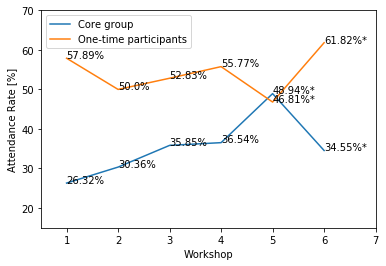

In [7]:
# Plot rates trend
%matplotlib inline
attendance_rate_data = attendance_data.drop(
    columns=["num_core_group", "num_one_time_participants", "num_non_regular_participants", "num_participants", "rate_non_regular_participants_to_num_participants"])
ax = attendance_rate_data.plot.line()

# Adjust x and y axis as well as the legend
ax.set_xbound(0.5, 5.5)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax.set_xlabel("Workshop")
ax.set_ybound(15, 70)
ax.set_ylabel("Attendance Rate [%]")
ax.legend(["Core group", "One-time participants"], loc="upper left")

# Print values
for index, value in enumerate(attendance_rate_data["rate_core_to_num_participants"]):
    if index < len(attendance_rate_data) - 2:
        ax.text(index + 1, value, str(round(value, 2)) + "%")
    else:
        ax.text(index + 1, value, str(round(value, 2)) + "%*")
    
for index, value in enumerate(attendance_rate_data["rate_one_time_to_num_participants"]):
    if index < len(attendance_rate_data) - 2:
        ax.text(index + 1, value, str(round(value, 2)) + "%")
    else:
        ax.text(index + 1, value, str(round(value, 2)) + "%*")

\* The data points of the indicated workshops are usually subject to a larger change because:
* From the current point of time it is unclear whether the identified one-time participants of the last workshop will attend the next workshop and become members of the core group or not.
* It is unclear whether the trend of new core group members joined at the fifth workshop will last.

### How many participants attended the next workshop as well?

In [8]:
# Define the attended next data
attended_next_data = {
    "workshop": [1, 2, 3, 4, 5],
    "num_attended_next": [
        len(participants[(participants["1"] == True) & (participants["2"] == True)]),
        len(participants[(participants["2"] == True) & (participants["3"] == True)]),
        len(participants[(participants["3"] == True) & (participants["4"] == True)]),
        len(participants[(participants["4"] == True) & (participants["5"] == True)]),
        len(participants[(participants["5"] == True) & (participants["6"] == True)])
    ],
    "num_participants": workshops.num_participants.values[:-1]
}
attended_next_data = pd.DataFrame(attended_next_data)
attended_next_data["attended_next_rate"] = attended_next_data["num_attended_next"] / attended_next_data["num_participants"] * 100
attended_next_data = attended_next_data.set_index("workshop")

attended_next_data.head(6)

,num_attended_next,num_participants,attended_next_rate
workshop,,,
1,20,57,35.087719
2,15,56,26.785714
3,16,53,30.188679
4,13,52,25.000000
5,16,47,34.042553


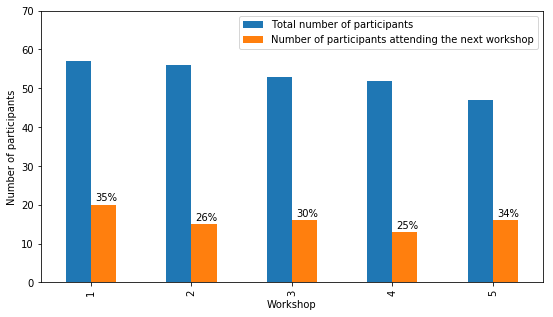

In [9]:
# Plot the attended next data
attended_next_plot = attended_next_data.drop(columns=["attended_next_rate"])
attended_next_plot = attended_next_plot[["num_participants", "num_attended_next"]] # Ensure the right column order
ax = attended_next_plot.plot.bar(figsize=(9, 5))
ax.set_xlabel("Workshop")
ax.set_ylabel("Number of participants")
ax.set_ybound(0, 70)
ax.legend(["Total number of participants", "Number of participants attending the next workshop"])

# Print attended next rate values
num_pairs = 5
attended_next_rates = ["{}%".format(int(value)) for value in attended_next_data.attended_next_rate.values]
make_pairs = zip(*[ax.get_children()[:num_pairs], ax.get_children()[num_pairs:num_pairs*2]])
for index, (left, right) in enumerate(make_pairs):
    ax.text(index + 0.15, min(left.get_bbox().y1, right.get_bbox().y1) + 1, attended_next_rates[index], horizontalalignment="center")

## Analysis of the attendance origin location
In the following we analyse the origin locations of the workshop participants and how it influences their attendance.

### Where do the participants of the workshop series origin from?

In [10]:
# Count the amount of participants of the workshop series per location
location_distribution = locations.location.value_counts()
location_distribution_filt = location_distribution[location_distribution >= 5]
location_distribution_filt

OP    81
BS    74
BA    43
KP    25
ST    17
JE    17
GO    15
HB    11
BO    10
NZ     8
HA     6
Name: location, dtype: int64

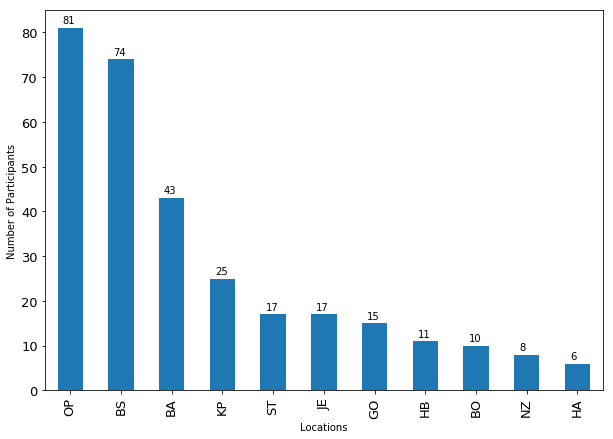

In [11]:
# Plot the locatio dictribution data
ax = location_distribution_filt.plot(kind='bar', figsize=(10,7),
                                        fontsize=13);
ax.set_xlabel("Locations")
ax.set_ylabel("Number of Participants");

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height()+1, \
            str(i.get_height()))

### Do more people attend a workshop if it is run at their home location?

In [12]:
# From which locations are the participants for each workshop?
location_distribution_per_ws = pd.DataFrame({"1: BS": locations_ws1.location.value_counts(),
                                       "2: KP": locations_ws2.location.value_counts(),
                                       "3: OP": locations_ws3.location.value_counts(),
                                       "4: BA": locations_ws4.location.value_counts(),
                                       "5: HB": locations_ws5.location.value_counts(),
                                       "6: JE": locations_ws6.location.value_counts()})

# Filter chart down to locations where a workshop took place
location_distribution_per_ws_filtered = location_distribution_per_ws.loc[['BS', 'KP', 'OP', 'BA', 'HB', 'JE']]

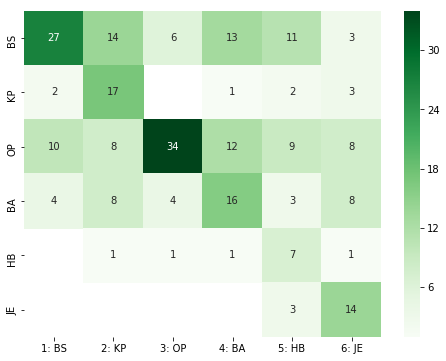

In [13]:
# Create a heatmap of the location-scpecific distribution of participant data
# X axis: location names of the workshops ordered chronologically
# Y axis: number of participants from the indicated locations
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(figsize=(8, 6))  
seaborn.heatmap(location_distribution_per_ws_filtered, cmap="Greens", annot=True)

#### Some effects and (possible) explanations:
- Determinate shows the # of participants of a location when the workshop took place there. Usually, the largest participant group comes from the location at which the workshop takes place. Exception: HB.
- BS row: 11 => Topic "Embedded Systems" was a driver from some specific departments to more or less jointly attend the workshop.
- BS row: columns "1:BS" (27) and "2:KP" (14) => Two BS institutes have been involved in the initial workshop series setup. Thus, there are quite many BS participants for BS/KP.
- JE row: No one from JE attended the first 4 workshops. Reason: The JE location did not exist at this time.  

Text(0,0.5,'Number of participants')

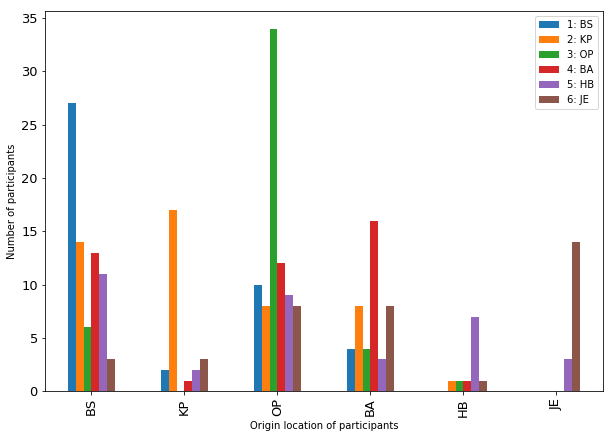

In [14]:
# Plot the same data as bar chart
ax = location_distribution_per_ws_filtered.plot(kind='bar', figsize=(10,7), fontsize=13)
ax.set_xlabel("Origin location of participants")
ax.set_ylabel("Number of participants")

### How many more people attend a workshop if it is run at their location?

Netx, we calculate the factor of which the number of participants increase when the workshop is run at the home location in comparison to the participation in external workshops.

In [15]:
def calc_factor(location):
    local_ws = location_distribution_per_ws.loc[location].max() # Max can be used since all local workshops were visited by the most participants in comparison to external workshops
    external_ws = location_distribution_per_ws.loc[location].sum() - local_ws
    external_ws_avg = (external_ws / 5)
    diff = local_ws - external_ws_avg
    factor = local_ws / external_ws_avg
    print ("The workshop in", location, "was visited by", diff, "more participants from", location, "than an average external one.")
    print ("The workshop in", location, "was visited by", factor, "times more participants from", location, "than an average external one.\n")

for location in locations.index.levels[0]:
    calc_factor(location)

The workshop in BS was visited by 17.6 more participants from BS than an average external one.
The workshop in BS was visited by 2.872340425531915 times more participants from BS than an average external one.

The workshop in KP was visited by 15.4 more participants from KP than an average external one.
The workshop in KP was visited by 10.625 times more participants from KP than an average external one.

The workshop in OP was visited by 24.6 more participants from OP than an average external one.
The workshop in OP was visited by 3.6170212765957444 times more participants from OP than an average external one.

The workshop in BA was visited by 10.6 more participants from BA than an average external one.
The workshop in BA was visited by 2.962962962962963 times more participants from BA than an average external one.

The workshop in HB was visited by 6.2 more participants from HB than an average external one.
The workshop in HB was visited by 8.75 times more participants from HB than 

## Analysis of the relation between one-time participants and origin location
More people attend a workshop if it is run at their origin location. The resulting question is: Are those the one-time participants we identified earlier? What seems to be more important: The topic or the location.

### Do one-time participants attend local or external workshops?

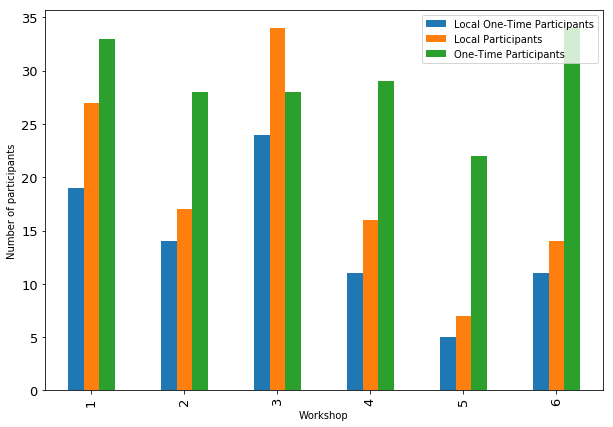

In [16]:
from collections import OrderedDict

one_time = []
one_time_local = []
local = []

for location in locations.index.levels[0]:
    location_data = locations.loc[location]
    one_time.append(location_data.one_time_participant.value_counts()[True])
    one_time_local.append(location_data[location_data.location == location].one_time_participant.value_counts()[True])
    local.append(len(location_data[location_data.location == location]))

data = OrderedDict()
data["Workshop"] = [1, 2, 3, 4, 5, 6]
data["Local One-Time Participants"] = one_time_local
data["Local Participants"] = local
data["One-Time Participants"] = one_time
local_one_timers = pd.DataFrame(data)
local_one_timers = local_one_timers.set_index("Workshop")

# plot data
ax = local_one_timers.plot(kind='bar', figsize=(10,7), fontsize=13)
ax.set_xlabel("Workshop")
ax.set_ylabel("Number of participants");